In [11]:
import sys

# Replace this with the path to the repository
sys.path.append("/home/zhenhao/ETFMH/")

In [27]:
from db_sketching.kmer_set import KMerSet, FracMinHash
from Bio import SeqIO

# Path to the datasets we are testing
data_1 = ["../data/562.fna"]
data_2 = ["../data/1280.fna"]

# The boolean function used in FracMinHash
def cond(kmer_hash):
    hash = (976369 * kmer_hash + 1982627) % 10000
    if hash < 50:
        return True
    else:
        return False

containment = []
ANI = []
set_size = []

for k in range(8, 52):    
    frac1 = FracMinHash(cond, k)
    frac2 = FracMinHash(cond, k)

    # insert dataset
    frac1.insert_file_list(data_1)
    frac2.insert_file_list(data_2)

    # Calculate containment index and estimate ANI
    containment.append(frac1.containment(frac2))
    ANI.append(frac1.ANI_estimation(frac2))

    # Record the size of k-mer set as well
    set_size.append(len(frac1.set))

    print(f"k: {k},\tSet size: {set_size[-1]},\tcontainment: {containment[-1]},\tANI: {ANI[-1]}")


k: 8,	Set size: 162,	containment: 0.9938271604938271,	ANI: 0.9992263031768667
k: 9,	Set size: 644,	containment: 0.9503105590062112,	ANI: 0.9943530660329708
k: 10,	Set size: 2480,	containment: 0.7592741935483871,	ANI: 0.9728365164066104
k: 11,	Set size: 7739,	containment: 0.48869362966791574,	ANI: 0.9369806174294465
k: 12,	Set size: 15702,	containment: 0.24226213221245702,	ANI: 0.8885675751089439
k: 13,	Set size: 21592,	containment: 0.10031493145609485,	ANI: 0.837880277263724
k: 14,	Set size: 24483,	containment: 0.03435036555977617,	ANI: 0.7860020320134284
k: 15,	Set size: 25103,	containment: 0.010357327809425169,	ANI: 0.7373661240743523
k: 16,	Set size: 25303,	containment: 0.0028059913844208197,	ANI: 0.6926365349426855
k: 17,	Set size: 25432,	containment: 0.0007470902799622523,	ANI: 0.6547579341421563
k: 18,	Set size: 25403,	containment: 0.00019682714640003148,	ANI: 0.6224662845059088
k: 19,	Set size: 25103,	containment: 0.0001593435047603872,	ANI: 0.6311358667203568
k: 20,	Set size: 2

In [29]:
import pandas as pd
import numpy as np

# Put all results into a dataframe
res = pd.DataFrame({"k": np.arange(8, 52), "set size": set_size, "containment": containment, "Estimated ANI": ANI})

In [22]:
len(ANI)

18

In [6]:
containment_1 = [1.0] + containment
containment_1 = containment_1[:-1]

In [26]:
import numpy as np

np.array(containment) / np.array(containment_1)

ValueError: operands could not be broadcast together with shapes (18,) (44,) 

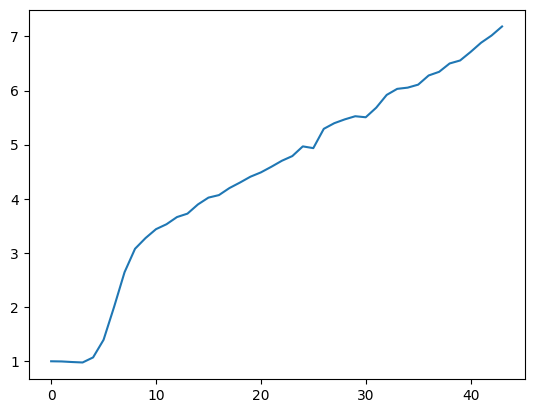

In [16]:
import matplotlib.pyplot as plt

plt.plot(np.array(containment) / np.array(containment_1))

<Axes: xlabel='k', ylabel='Estimated ANI'>

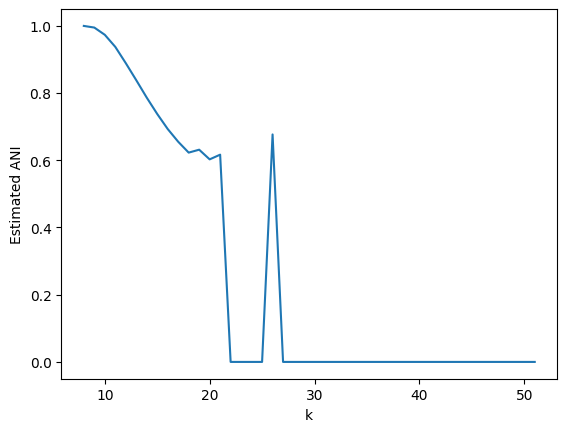

In [30]:
import seaborn as sns

sns.lineplot(res, x="k", y="Estimated ANI")

<Axes: xlabel='k', ylabel='containment'>

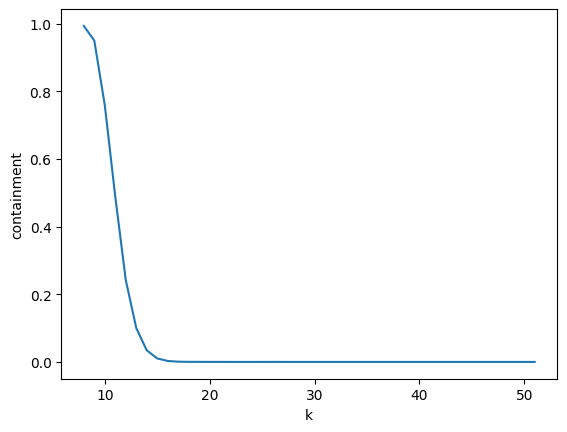

In [31]:
sns.lineplot(res, x="k", y="containment")

<Axes: xlabel='k', ylabel='set size'>

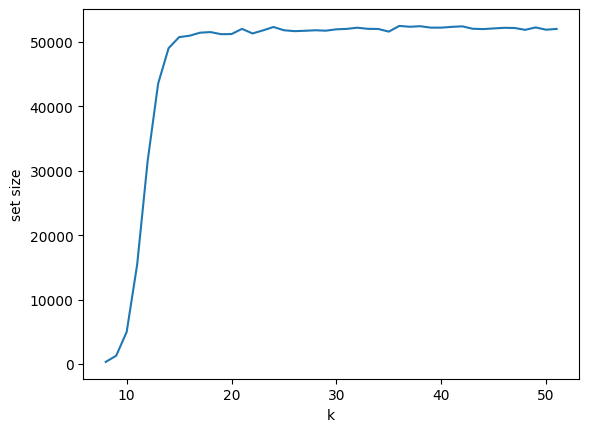

In [28]:
sns.lineplot(res, x="k", y="set size")